In [1]:
import pandas as pd

# Carico il dataset da analizzare
df = pd.read_csv('dpc-covid19-ita-regioni.csv')

# Definisco le colonne da mantenere per l'analisi
colonne_da_analizzare = [
    'data',
    'codice_regione',
    'denominazione_regione',
    'ricoverati_con_sintomi',
    'terapia_intensiva',
    'totale_ospedalizzati',
    'isolamento_domiciliare',
    'totale_positivi',
    'dimessi_guariti',
    'deceduti',
    'totale_casi',
    'tamponi',
    'casi_testati',
    'note_test',
    'note_casi'
]

# Seleziono le colonne necessarie per l'analisi e ottendo un nuovo DF ridotto
df_ridotto = df[colonne_da_analizzare]

# Definisco le date di inizio e di fine per il filtro
start_date = '2020-03-01'
end_date = '2022-12-31'

# Converto il formato della colonna data in un 'datetime'
pd.to_datetime(df_ridotto['data'])

# Filtra i dati tra le date di inizio e fine
df_filtrato = df_ridotto[(df_ridotto['data'] >= start_date) & (df_ridotto['data'] <= end_date)]

df_filtrato.to_csv('DatasetCovid19_filtrato.csv')

# Raggruppa i dati per la colonna 'denominazione_regione'
# e calcola la somma del totale della popolazione per genere e generale.
dati_raggruppati = df_filtrato.groupby('denominazione_regione').agg(
            ricoverati_con_sintomi=('ricoverati_con_sintomi', 'sum'),
            terapia_intensiva=('terapia_intensiva', 'sum'),
            totale_ospedalizzati=('totale_ospedalizzati', 'sum'),
            isolamento_domiciliare=('isolamento_domiciliare', 'sum'),
            totale_positivi=('totale_positivi', 'sum'),
            dimessi_guariti=('dimessi_guariti', 'sum'),
            tamponi=('tamponi', 'sum'),
            casi_testati=('casi_testati', 'sum'),
        ).reset_index() # reset_index() trasforma 'denominazione_regione' da indice a colonna	

dati_raggruppati.to_csv('DatasetCovid19_raggruppato.csv')


In [2]:
import pandas as pd

# Carico il dataset da analizzare
df = pd.read_csv('popolazione-istat-regione-range.csv')

# Definisco le colonne da mantenere per l'analisi
colonne_da_analizzare = [
    'codice_regione',
    'denominazione_regione',
    'totale_genere_maschile',
    'totale_genere_femminile',
    'totale_generale'
]

# Seleziono le colonne necessarie per l'analisi e ottendo un nuovo DF ridotto
df_ridotto = df[colonne_da_analizzare]

# Raggruppa i dati per la colonna 'denominazione_regione'
# e calcola la somma del totale della popolazione per genere e generale.
dati_raggruppati = df_ridotto.groupby('denominazione_regione').agg(
            popolazione_maschile_totale=('totale_genere_maschile', 'sum'),
            popolazione_femminile_totale=('totale_genere_femminile', 'sum'),
            popolazione_generale_totale=('totale_generale', 'sum')
        ).reset_index() # reset_index() trasforma 'denominazione_regione' da indice a colonna

dati_raggruppati.to_csv('Popolazione_raggruppato.csv')

In [14]:
import pandas as pd

# Carico il dataset Vaccinazioni2020
vaccinazioni2020 = pd.read_csv('Vaccinazioni2020.csv')

# Carico il dataset Vaccinazioni2021
vaccinazioni2021 = pd.read_csv('Vaccinazioni2021.csv')

# Carico il dataset Vaccinazioni2022
vaccinazioni2022 = pd.read_csv('Vaccinazioni2022.csv')

# Raggruppa i dati per 'reg' e somma le colonne 'd1' e 'dpi'
somma_per_regione2020 = vaccinazioni2020.groupby('reg')[['d1', 'dpi']].sum().reset_index()
somma_per_regione2021 = vaccinazioni2021.groupby('reg')[['d1', 'dpi']].sum().reset_index()
somma_per_regione2022 = vaccinazioni2022.groupby('reg')[['d1', 'dpi']].sum().reset_index()

# Crea la nuova colonna 'totale' che è la somma di 'd1' e 'dpi'
somma_per_regione2020['Totali Dosi Somministrate 2020'] = somma_per_regione2020['d1'] + somma_per_regione2020['dpi']
somma_per_regione2021['Totali Dosi Somministrate 2021'] = somma_per_regione2021['d1'] + somma_per_regione2021['dpi']
somma_per_regione2022['Totali Dosi Somministrate 2022'] = somma_per_regione2022['d1'] + somma_per_regione2022['dpi']

# Rinomina la colonna 'reg' in 'denominazione_regione'
# Usa inplace=True per applicare la modifica direttamente al DataFrame
somma_per_regione2020.rename(columns={'reg': 'denominazione_regione'}, inplace=True)

# Definisco le colonne da mantenere per l'analisi
colonne_da_analizzare = [
    'denominazione_regione',
    'Totali Dosi Somministrate 2020'
]

vaccinazioni = somma_per_regione2020[colonne_da_analizzare]

vaccinazioni['Totali Dosi Somministrate 2021'] = somma_per_regione2021['Totali Dosi Somministrate 2021']
vaccinazioni['Totali Dosi Somministrate 2022'] = somma_per_regione2022['Totali Dosi Somministrate 2022']

# Modifico i valori della colonna 'denominazione_regione'
# "Provincia Autonoma Bolzano / Bozen"; "P.A. Bolzano"; 
# "Provincia Autonoma Trento"; "P.A. Trento"; 
# "Valle d'Aosta / Vallée d'Aoste"; "Valle d'Aosta"; 
# "Friuli-Venezia Giulia"; "Friuli Venezia Giulia"; 
vaccinazioni.loc[vaccinazioni['denominazione_regione'] == 'Provincia Autonoma Bolzano / Bozen', 'denominazione_regione'] = 'P.A. Bolzano'
vaccinazioni.loc[vaccinazioni['denominazione_regione'] == 'Provincia Autonoma Trento', 'denominazione_regione'] = 'P.A. Trento'
vaccinazioni.loc[vaccinazioni['denominazione_regione'] == "Valle d'Aosta / Vallée d'Aoste", 'denominazione_regione'] = "Valle d'Aosta"
vaccinazioni.loc[vaccinazioni['denominazione_regione'] == 'Friuli-Venezia Giulia', 'denominazione_regione'] = 'Friuli Venezia Giulia'

vaccinazioni.to_csv('Vaccinazioni_raggruppato.csv')


C:\Users\emau7\AppData\Local\Temp\ipykernel_14976\413177232.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vaccinazioni['Totali Dosi Somministrate 2021'] = somma_per_regione2021['Totali Dosi Somministrate 2021']


In [2]:
import pandas as pd

# Carico il dataset Covid19 da unire
datasetCovid19 = pd.read_csv('DatasetCovid19_raggruppato.csv')

# Carico il dataset Popolazione da unire
popolazione = pd.read_csv('Popolazione_raggruppato.csv')

# Carico il dataset Vaccinazioni da unire
vaccinazioni = pd.read_csv('Vaccinazioni_raggruppato.csv')

# Modifico i valori della colonna 'denominazione_regione' Bolzano e Trento in 'P.A. Bolzano' e 'P.A. Trento'
popolazione.loc[popolazione['denominazione_regione'] == 'Bolzano', 'denominazione_regione'] = 'P.A. Bolzano'
popolazione.loc[popolazione['denominazione_regione'] == 'Trento', 'denominazione_regione'] = 'P.A. Trento'

df_unito = pd.merge(datasetCovid19, popolazione, how='left', on='denominazione_regione')
df_unito = pd.merge(df_unito, vaccinazioni, how='left', on='denominazione_regione')

df_finale = df_unito[['denominazione_regione', 'ricoverati_con_sintomi',
       'terapia_intensiva', 'totale_ospedalizzati', 'isolamento_domiciliare',
       'totale_positivi', 'dimessi_guariti', 'tamponi', 'casi_testati',
       'popolazione_maschile_totale',
       'popolazione_femminile_totale', 'popolazione_generale_totale', 
       'Totali Dosi Somministrate 2020','Totali Dosi Somministrate 2021','Totali Dosi Somministrate 2022']]

df_finale.to_excel('DatasetCompleto.xlsx')


Creazione di indicatori per Dataset COVID19
1 -> Tot Deceduti raggruppati per anno e regione
2 -> Tot Dimessi Guariti raggruppati per anno e regione
3 -> Tot Vaccinati raggruppati per anno e regione

In [6]:
import pandas as pd

# Carico il dataset Covid19_filtrato
datasetCovid19 = pd.read_csv('DatasetCovid19_filtrato.csv')

# =QUERY(Filtro_Record!A:L; "SELECT C, MAX(J) 
# WHERE A >= '2020-03-01' AND A < '2021-01-01' 
# GROUP BY C 
# LABEL C 'Regione', MAX(J) 'Totale Deceduti 2020' ")

# Converte la colonna 'data' in formato datetime per poterla filtrare
datasetCovid19['data'] = pd.to_datetime(datasetCovid19['data'])

# Filtra il DataFrame per includere solo le date tra il 1 marzo 2020 e il 31 dicembre 2020
df_2020 = datasetCovid19[(datasetCovid19['data'] >= '2020-03-01') & (datasetCovid19['data'] < '2021-01-01')]
# Filtra il DataFrame per includere solo le date tra il 1 gennaio 2021 e il 31 dicembre 2021
df_2021 = datasetCovid19[(datasetCovid19['data'] >= '2021-01-01') & (datasetCovid19['data'] < '2022-01-01')]
# Filtra il DataFrame per includere solo le date tra il 1 gennaio 2022 e il 31 dicembre 2022
df_2022 = datasetCovid19[(datasetCovid19['data'] >= '2022-01-01') & (datasetCovid19['data'] < '2023-01-01')]

# Raggruppa per 'denominazione_regione' e trova il valore massimo della colonna 'deceduti'
deceduti_2020 = df_2020.groupby('denominazione_regione')['deceduti'].max().reset_index()
deceduti_2021 = df_2021.groupby('denominazione_regione')['deceduti'].max().reset_index()
deceduti_2022 = df_2022.groupby('denominazione_regione')['deceduti'].max().reset_index()

# Rinomina le colonne per chiarezza, come nella tua query di Google Sheets
deceduti_2020 = deceduti_2020.rename(columns={'denominazione_regione': 'Regione', 'deceduti': 'Totale Deceduti 2020'})
deceduti_2021 = deceduti_2021.rename(columns={'denominazione_regione': 'Regione', 'deceduti': 'Totale Deceduti 2021'})
deceduti_2022 = deceduti_2022.rename(columns={'denominazione_regione': 'Regione', 'deceduti': 'Totale Deceduti 2022'})

df_unito = pd.merge(deceduti_2020, deceduti_2021, how='left', on='Regione')
df_unito = pd.merge(df_unito, deceduti_2022, how='left', on='Regione')

df_unito.to_excel('IndicatoreDeceduti.xlsx')


In [10]:
import pandas as pd

# Carico il dataset Covid19_filtrato
datasetCovid19 = pd.read_csv('DatasetCovid19_filtrato.csv')

# Converte la colonna 'data' in formato datetime per poterla filtrare
datasetCovid19['data'] = pd.to_datetime(datasetCovid19['data'])

# Filtra il DataFrame per includere solo le date tra il 1 marzo 2020 e il 31 dicembre 2020
df_2020 = datasetCovid19[(datasetCovid19['data'] >= '2020-03-01') & (datasetCovid19['data'] < '2021-01-01')]
df_2021 = datasetCovid19[(datasetCovid19['data'] >= '2021-01-01') & (datasetCovid19['data'] < '2022-01-01')]
df_2022 = datasetCovid19[(datasetCovid19['data'] >= '2022-01-01') & (datasetCovid19['data'] < '2023-01-01')]

# Raggruppa per 'denominazione_regione' e trova il valore massimo della colonna 'dimessi_guariti'
dimessi_guariti_2020 = df_2020.groupby('denominazione_regione')['dimessi_guariti'].max().reset_index()
dimessi_guariti_2021 = df_2021.groupby('denominazione_regione')['dimessi_guariti'].max().reset_index()
dimessi_guariti_2022 = df_2022.groupby('denominazione_regione')['dimessi_guariti'].max().reset_index()

# Rinomina le colonne per chiarezza, come nella tua query di Google Sheets
dimessi_guariti_2020 = dimessi_guariti_2020.rename(columns={'denominazione_regione': 'Regione', 'dimessi_guariti': 'Totale Dimessi Guariti 2020'})
dimessi_guariti_2021 = dimessi_guariti_2021.rename(columns={'denominazione_regione': 'Regione', 'dimessi_guariti': 'Totale Dimessi Guariti 2021'})
dimessi_guariti_2022 = dimessi_guariti_2022.rename(columns={'denominazione_regione': 'Regione', 'dimessi_guariti': 'Totale Dimessi Guariti 2022'})

df_unito = pd.merge(dimessi_guariti_2020, dimessi_guariti_2021, how='left', on='Regione')
df_unito = pd.merge(df_unito, dimessi_guariti_2022, how='left', on='Regione')

df_unito.to_excel('IndicatoreDimessiGuariti.xlsx')

In [26]:
import pandas as pd

# Carico il dataset Covid19_filtrato
vaccinazioni = pd.read_csv('Vaccinazioni_raggruppato.csv')

# Crea la nuova colonna 'Totale Vaccinati' sommando le colonne dei tre anni
vaccinazioni['Totale Vaccinati'] = vaccinazioni['Totali Dosi Somministrate 2020'] + vaccinazioni['Totali Dosi Somministrate 2021'] + vaccinazioni['Totali Dosi Somministrate 2022']

# 2. Elimina la colonna "Unnamed: 0"
# Utilizza il metodo .drop() con l'argomento axis=1 per specificare che vuoi eliminare una colonna
vaccinazioni.drop('Unnamed: 0', axis=1, inplace=True)

vaccinazioni = vaccinazioni.rename(columns={'denominazione_regione': 'Regione'})

vaccinazioni.to_excel('IndicatoreVaccinazioni.xlsx')


Grafici per rappresentare i dati 

- Deceduti -> Grafico a Barre Raggruppate
- DimessiGuariti -> Grafico a Barre in Pila
- Vaccinazioni -> Grafico a Linee Multiple
- Dati Covid 7g -> Grafico a Linee Multiple
- Dati Vaccinazioni 7g -> Grafico a Linee Multiple

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 1. Caricamento del dataset
file_path = 'IndicatoreDeceduti.xlsx'
df = pd.read_excel(file_path)

# Rimuovi la prima colonna non necessaria se presente
if 'Unnamed: 0' in df.columns:
    df = df.drop(columns=['Unnamed: 0'])
    
# 2. Preparazione dei dati per il grafico
# Definisci le etichette per l'asse X (Regioni)
regioni = df['Regione']

# Definisci i valori per le barre (Totale Deceduti per ogni anno)
decessi_2020 = df['Totale Deceduti 2020']
decessi_2021 = df['Totale Deceduti 2021']
decessi_2022 = df['Totale Deceduti 2022']

# Imposta le posizioni delle barre sull'asse X
x = np.arange(len(regioni))
width = 0.25 # Larghezza delle barre

# 3. Creazione del grafico
fig, ax = plt.subplots(figsize=(15, 8)) # Imposta le dimensioni della figura per una migliore leggibilità

# Crea le barre raggruppate per ogni anno
bar1 = ax.bar(x - width, decessi_2020, width, label='Totale Deceduti 2020', color='#004B87')
bar2 = ax.bar(x, decessi_2021, width, label='Totale Deceduti 2021', color='#E69F00')
bar3 = ax.bar(x + width, decessi_2022, width, label='Totale Deceduti 2022', color='#56B4E9')

# 4. Aggiunta di etichette e personalizzazione del grafico
ax.set_ylabel('Numero di Deceduti', fontsize=12)
ax.set_title('Decessi per Regione (2020-2022)', fontsize=16, fontweight='bold')
ax.set_xticks(x) # Imposta le posizioni delle etichette sull'asse X
ax.set_xticklabels(regioni, rotation=90, ha='right', fontsize=10) # Ruota le etichette per evitare sovrapposizioni
ax.legend()
ax.grid(axis='y', linestyle='--', alpha=0.7)



# Mostra il grafico
plt.tight_layout() # Ottimizza il layout per evitare sovrapposizioni
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Caricamento del dataset
# Assicurati che il nome del file corrisponda a quello che hai caricato
file_path = 'IndicatoreDimessiGuariti.xlsx'
df = pd.read_excel(file_path)

# Rimuovi la prima colonna non necessaria se presente
if 'Unnamed: 0' in df.columns:
    df = df.drop(columns=['Unnamed: 0'])

# 2. Preparazione dei dati per il grafico
# Imposta la colonna 'Regione' come indice per facilitare la creazione del grafico
df = df.set_index('Regione')

# 3. Creazione del grafico a barre in pila
fig, ax = plt.subplots(figsize=(12, 8))

# Genera il grafico a barre in pila
df.plot(kind='bar', stacked=True, ax=ax, colormap='viridis')

# 4. Personalizzazione del grafico
ax.set_title('Dimessi Guariti per Regione (2020-2022)', fontsize=16, fontweight='bold')
ax.set_xlabel('Regioni', fontsize=12)
ax.set_ylabel('Numero di Dimessi Guariti', fontsize=12)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='right', fontsize=10) # Mantiene le etichette dell'anno orizzontali
ax.legend(title='Dimessi Guariti', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Mostra il grafico
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Caricamento del dataset
file_path = 'IndicatoreVaccinazioni.xlsx'
df = pd.read_excel(file_path)

# 2. Preparazione dei dati per il grafico
# Rimuovi la colonna 'Totale Vaccinati' in quanto non è un dato temporale
# e può rendere il grafico a linee fuorviante.
df = df.drop(columns=['Totale Vaccinati'])

# Rinomina le colonne degli anni per una visualizzazione più pulita
df.columns = ['Unnamed: 0', 'Regione', '2020', '2021', '2022']

# Imposta la colonna 'Regione' come indice
df = df.set_index('Regione')

# Rimuovi la prima colonna non necessaria
if 'Unnamed: 0' in df.columns:
    df = df.drop(columns=['Unnamed: 0'])

# Transponi il DataFrame per avere gli anni sull'asse X
# e ogni colonna che rappresenta una regione
df_transposed = df.transpose()

# 3. Creazione del grafico a linee
fig, ax = plt.subplots(figsize=(15, 8))

# Genera il grafico a linee
df_transposed.plot(kind='line', ax=ax, marker='o')

# 4. Aggiunta di etichette e personalizzazione
ax.set_title('Andamento delle Dosi di Vaccino per Regione (2020-2022)', fontsize=16, fontweight='bold')
ax.set_xlabel('Anno', fontsize=12)
ax.set_ylabel('Dosi Somministrate', fontsize=12)
ax.set_xticks(range(len(df_transposed.index)))
ax.set_xticklabels(df_transposed.index, rotation=0)

# Aggiungi una legenda posizionata fuori dal grafico per evitare sovrapposizioni
ax.legend(title='Regioni', bbox_to_anchor=(1.05, 1), loc='upper left')

# Abilita la griglia per una migliore leggibilità
plt.grid(True, linestyle='--', alpha=0.6)

# Mostra il grafico
plt.tight_layout() # Ottimizza il layout per evitare sovrapposizioni
plt.show()

In [ ]:
import pandas as pd

# 1. Caricamento del dataset
file_path = 'DatasetCovid19_filtrato.csv'
df = pd.read_csv(file_path)

# Rimuovi la prima colonna non necessaria
if 'Unnamed: 0' in df.columns:
    df = df.drop(columns=['Unnamed: 0'])
    
# Converte la colonna 'data' in formato datetime per poterla filtrare
df['data'] = pd.to_datetime(df['data'])

# Rimuove righe con date mancanti
df = df.dropna(subset=['data'])

# Raggruppo per giorno e per regione il numero di positivi
df_aggr = df.groupby(['data','denominazione_regione'])['totale_positivi'].sum().reset_index()

# Ordino i dati per la colonna 'data'
df_aggr = df_aggr.sort_values(by='data')

# Trova la prima data del dataset
prima_data = df_aggr['data'].min() #'2020-03-01'

# Trova ultima data del dataset
ultima_data = df_aggr['data'].max() #'2022-12-30'

# Crea una lista di date suddivise in 7 giorni
date7g = pd.date_range(start=prima_data, end=ultima_data, freq='7D')

df_aggr_filt = df_aggr[df_aggr['data'].isin(date7g)]

df_aggr_filt.to_excel('IndicatorePositivi7giorni.xlsx')

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Carica il dataset
df = pd.read_excel('IndicatorePositivi7giorni.xlsx')

# Conversione della colonna 'data' in formato datetime
df['data'] = pd.to_datetime(df['data'])

# Riordina il dataframe per data e regione per una corretta visualizzazione
df = df.sort_values(by=['data', 'denominazione_regione'])

# Creazione del grafico
plt.figure(figsize=(15, 8)) # Imposta le dimensioni del grafico

# Ciclo sulle regioni per creare una linea per ciascuna
for regione in df['denominazione_regione'].unique():
    dati_regione = df[df['denominazione_regione'] == regione]
    plt.plot(dati_regione['data'], dati_regione['totale_positivi'], label=regione)
    
# Personalizzazione del grafico
plt.title('Andamento dei casi positivi per regione', fontsize=16)
plt.xlabel('Data', fontsize=12)
plt.ylabel('Totale casi positivi', fontsize=12)
plt.legend(title='Regione', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout() # Adatta i margini per visualizzare tutti gli elementi

# Mostra il grafico
plt.show()


In [ ]:
import pandas as pd

# Carico il dataset Vaccinazioni2020
vaccinazioni2020 = pd.read_csv('Vaccinazioni2020.csv')

# Carico il dataset Vaccinazioni2021
vaccinazioni2021 = pd.read_csv('Vaccinazioni2021.csv')

# Carico il dataset Vaccinazioni2022
vaccinazioni2022 = pd.read_csv('Vaccinazioni2022.csv')

vaccinazioni2020['Totale Vaccinazioni'] = vaccinazioni2020['d1'] + vaccinazioni2020['dpi']
vaccinazioni2021['Totale Vaccinazioni'] = vaccinazioni2021['d1'] + vaccinazioni2021['dpi']
vaccinazioni2022['Totale Vaccinazioni'] = vaccinazioni2022['d1'] + vaccinazioni2022['dpi']

# Unione dei due DataFrame in verticale (accodamento)
df_unito = pd.concat([vaccinazioni2020, vaccinazioni2021, vaccinazioni2022])

# Rinomina la colonna 'reg' in 'denominazione_regione'
# Usa inplace=True per applicare la modifica direttamente al DataFrame
df_unito.rename(columns={'reg': 'Regione'}, inplace=True)

# Modifico i valori della colonna 'Regione'
# "Provincia Autonoma Bolzano / Bozen"; "P.A. Bolzano"; 
# "Provincia Autonoma Trento"; "P.A. Trento"; 
# "Valle d'Aosta / Vallée d'Aoste"; "Valle d'Aosta"; 
# "Friuli-Venezia Giulia"; "Friuli Venezia Giulia"; 
df_unito.loc[df_unito['Regione'] == 'Provincia Autonoma Bolzano / Bozen', 'Regione'] = 'P.A. Bolzano'
df_unito.loc[df_unito['Regione'] == 'Provincia Autonoma Trento', 'Regione'] = 'P.A. Trento'
df_unito.loc[df_unito['Regione'] == "Valle d'Aosta / Vallée d'Aoste", 'Regione'] = "Valle d'Aosta"
df_unito.loc[df_unito['Regione'] == 'Friuli-Venezia Giulia', 'Regione'] = 'Friuli Venezia Giulia'


df_unito.to_excel('IndicatoreVaccinazioniPerData.xlsx')


In [ ]:
import pandas as pd

# Carica il dataset
df = pd.read_excel('IndicatoreVaccinazioniPerData.xlsx')

# Rimuovi la prima colonna non necessaria
if 'Unnamed: 0' in df.columns:
    df = df.drop(columns=['Unnamed: 0'])
    
# Converte la colonna 'data' in formato datetime per poterla filtrare
df['data'] = pd.to_datetime(df['data'])

# Rimuove righe con date o Regioni mancanti
df = df.dropna(subset=['data', 'Regione'])

# Raggruppo per giorno e per regione il numero di positivi
df = df.groupby(['data','Regione'])['Totale Vaccinazioni'].sum().reset_index()

# Ordino i dati per la colonna 'data'
df = df.sort_values(by='data')

# Trova la prima data del dataset
prima_data = df['data'].min() #'27/12/2020'

# Trova ultima data del dataset
ultima_data = df['data'].max() #'31/12/2022'

# Crea una lista di date suddivise in 7 giorni
date7g = pd.date_range(start=prima_data, end=ultima_data, freq='7D')

df_aggr_filt = df[df['data'].isin(date7g)]

df_aggr_filt.to_excel('IndicatoreVaccinazioniPerData7g.xlsx')

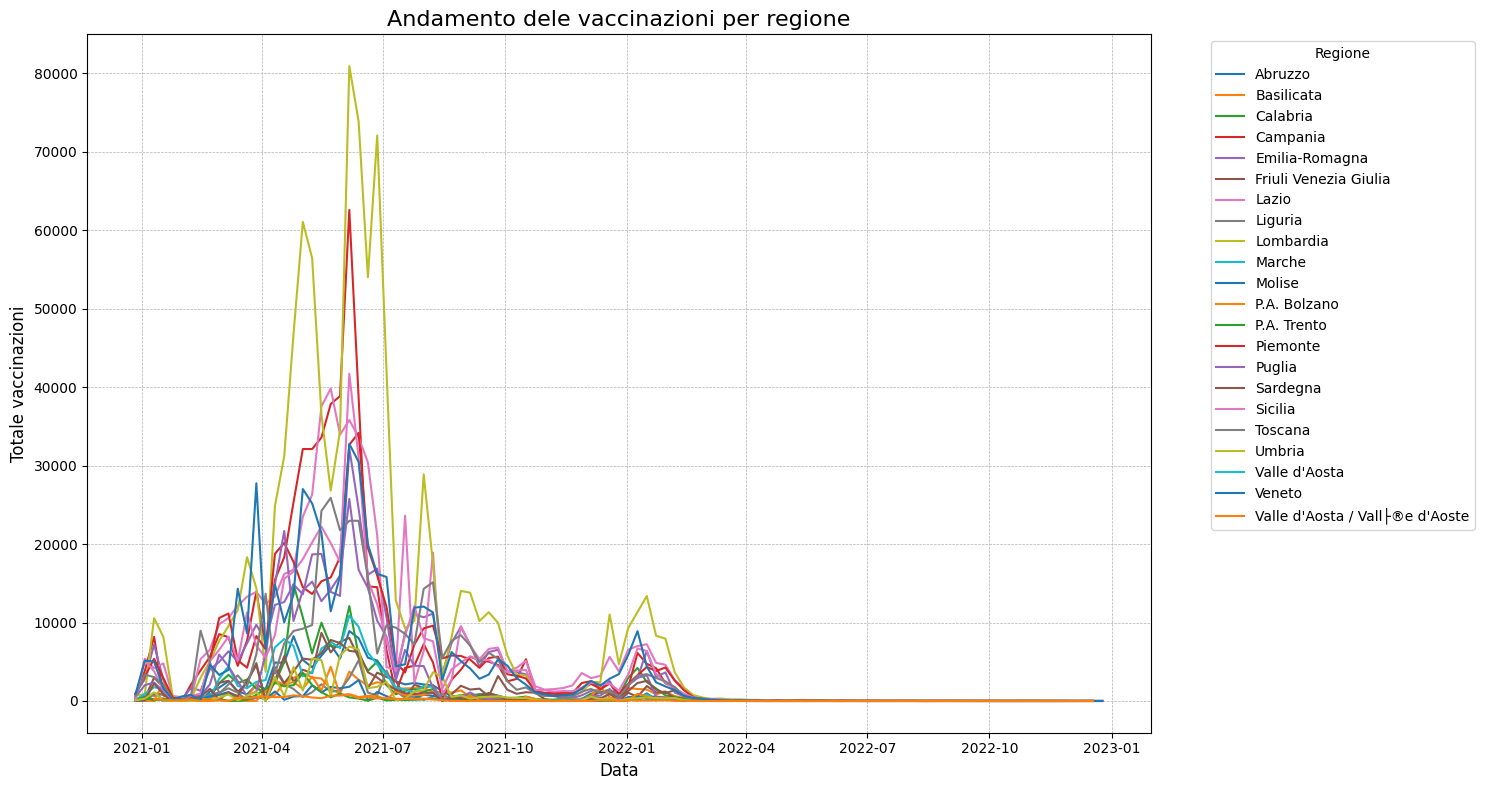

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Carica il dataset
df = pd.read_excel('IndicatoreVaccinazioniPerData7g.xlsx')

# Conversione della colonna 'data' in formato datetime
df['data'] = pd.to_datetime(df['data'])

# Riordina il dataframe per data e regione per una corretta visualizzazione
df = df.sort_values(by=['data', 'Regione'])

# Creazione del grafico
plt.figure(figsize=(15, 8)) # Imposta le dimensioni del grafico

# Ciclo sulle regioni per creare una linea per ciascuna
for regione in df['Regione'].unique():
    dati_regione = df[df['Regione'] == regione]
    plt.plot(dati_regione['data'], dati_regione['Totale Vaccinazioni'], label=regione)
    
# Personalizzazione del grafico
plt.title('Andamento delle vaccinazioni per regione', fontsize=16)
plt.xlabel('Data', fontsize=12)
plt.ylabel('Totale vaccinazioni', fontsize=12)
plt.legend(title='Regione', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout() # Adatta i margini per visualizzare tutti gli elementi

# Mostra il grafico
plt.show()